In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy import table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

a simple toy model where i assume ZERO obliquity, explore:
* random impact parameters (span 0--1, but not uniformly of course)
* random stellar inclinations (within range, tend to align star+planet orbit)
* varying spot latitude band (from 60 deg to 10 deg, 10deg band?)

- plot the... "sensitivity" (recovery fraction?) as a function of the spot latitude for these random inclinations/impact parameters



In [111]:
N = 50000

a_Rstar = 16.7 # approx for Hat-P-11


i_max = np.degrees(np.arcsin(1 / a_Rstar)) # what the maximum tilt you can still get a transit? (~3.5deg)

inclination = np.random.random(size=N) * i_max
b = a_Rstar * np.sin(np.radians(inclination))

i_b_offset = 5 # the gaussian (in deg) of offset between stellar inclination and orbital
i_g = inclination + np.random.normal(size=N) * i_b_offset # the now offset inclinations



# put mean spot latitudes between 10-60 deg
lat_mean = np.random.random(size=N) * 90
lat_width = 10. # just assume 10 deg band width always for now

lat_hit = np.degrees(np.arcsin(b)) + i_g

x = np.where((lat_hit >= lat_mean-lat_width) & (lat_hit <= lat_mean+lat_width))[0]

hit_key = np.zeros_like(lat_hit)
hit_key[x] = 1



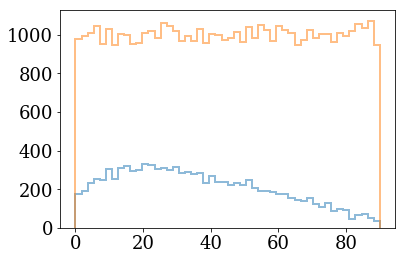

In [112]:
y1 = plt.hist(lat_mean, weights=hit_key, bins=50, alpha=0.5, histtype='step', lw=2)
y2 = plt.hist(lat_mean, bins=50, alpha=0.5, histtype='step', lw=2)


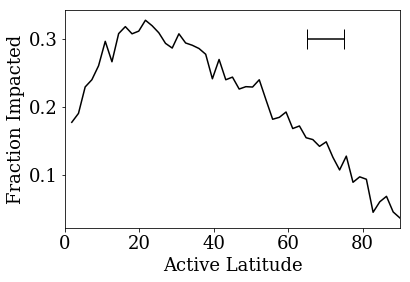

In [113]:
plt.plot(y1[1][1:], y1[0]/y2[0], c='k')
plt.errorbar(70,0.3,xerr=5, color='k',capsize=10)
plt.xlim(0,90)
plt.xlabel('Active Latitude')
plt.ylabel('Fraction Impacted')